In [126]:
import re
import csv
import collections
import matplotlib.pyplot as plt
from tqdm import trange
import numpy as np

In [96]:
def get_stats(vocab):
    pairs = collections.Counter()
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            try:
                pairs[symbols[i],symbols[i+1]] += freq
            except KeyError:
                pairs[symbols[i],symbols[i+1]] = freq
    return pairs

def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

In [125]:
vocab = {
    'l o w </w>' : 5,
    'l o w e r </w>' : 2,
    'n e w e s t </w>': 6,
    'w i d e s t </w>': 3
}
num_merges = 10
for i in trange(num_merges):
    pairs = get_stats(vocab)
    best, _ = pairs.most_common(1)[0]
    vocab = merge_vocab(best, vocab)
print(vocab)

100%|██████████| 10/10 [00:00<00:00, 9320.68it/s]

{'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'wi d est</w>': 3}


In [132]:
vocab = {
    'l o w </w>' : 5,
    'l o w e r </w>' : 2,
    'n e w e s t </w>': 6,
    'w i d e s t </w>': 3
}
unique_symbols = set([x for l in vocab.keys() for x in l.split()])
symbol_idx = {v:k for k,v in enumerate(unique_symbols)}

In [136]:
[(np.array([symbol_idx[char] for char in word.split()]), cnt) for word, cnt in vocab.items()]

[(array([2, 7, 1, 6]), 5),
 (array([2, 7, 1, 8, 0, 6]), 2),
 (array([ 3,  8,  1,  8, 10,  9,  6]), 6),
 (array([ 1,  5,  4,  8, 10,  9,  6]), 3)]

In [130]:
symbol_idx

{'l': 0,
 'o': 1,
 'w': 2,
 '</w>': 3,
 'e': 4,
 'r': 5,
 'n': 6,
 's': 7,
 't': 8,
 'i': 9,
 'd': 10}

In [97]:
data = []
with open('data/IMDB Dataset.csv') as f:
    r = csv.reader(f, delimiter=',', quotechar='"')
    for row in r:
        data.append(row)
texts, sentiment = list(zip(*data[1:]))

In [98]:
t = ' '.join(texts)

In [106]:
vocab = collections.Counter([' '.join(list(w)) + ' </w>' for w in t.split()])

In [107]:
num_merges = int(len(t.split()) * 4e-6)
counts = []
for i in trange(num_merges):
    pairs = get_stats(vocab)
    best, best_cnt = pairs.most_common(1)[0]
    vocab = merge_vocab(best, vocab)
    counts.append(best_cnt)

100%|██████████| 1000/1000 [14:55<00:00,  1.12it/s]


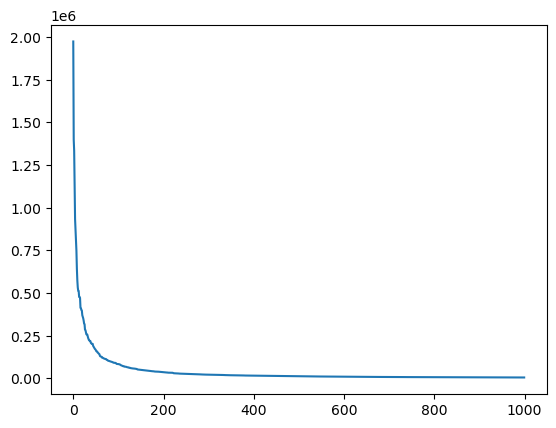

In [109]:
plt.plot(counts)

In [118]:
vocab = collections.Counter([' '.join(list(w)) + ' </w>' for w in t.split()])

In [120]:
pairs = get_stats(vocab)

In [123]:
pair_idx = dict(enumerate(pairs.keys()))

In [124]:
pair_idx

{0: ('O', 'n'),
 1: ('n', 'e'),
 2: ('e', '</w>'),
 3: ('o', 'f'),
 4: ('f', '</w>'),
 5: ('t', 'h'),
 6: ('h', 'e'),
 7: ('o', 't'),
 8: ('e', 'r'),
 9: ('r', '</w>'),
 10: ('r', 'e'),
 11: ('e', 'v'),
 12: ('v', 'i'),
 13: ('i', 'e'),
 14: ('e', 'w'),
 15: ('w', 'e'),
 16: ('r', 's'),
 17: ('s', '</w>'),
 18: ('h', 'a'),
 19: ('a', 's'),
 20: ('m', 'e'),
 21: ('e', 'n'),
 22: ('n', 't'),
 23: ('t', 'i'),
 24: ('i', 'o'),
 25: ('o', 'n'),
 26: ('e', 'd'),
 27: ('d', '</w>'),
 28: ('a', 't'),
 29: ('t', '</w>'),
 30: ('a', 'f'),
 31: ('f', 't'),
 32: ('t', 'e'),
 33: ('w', 'a'),
 34: ('t', 'c'),
 35: ('c', 'h'),
 36: ('h', 'i'),
 37: ('i', 'n'),
 38: ('n', 'g'),
 39: ('g', '</w>'),
 40: ('j', 'u'),
 41: ('u', 's'),
 42: ('s', 't'),
 43: ('1', '</w>'),
 44: ('O', 'z'),
 45: ('z', '</w>'),
 46: ('e', 'p'),
 47: ('p', 'i'),
 48: ('i', 's'),
 49: ('s', 'o'),
 50: ('o', 'd'),
 51: ('d', 'e'),
 52: ('y', 'o'),
 53: ('o', 'u'),
 54: ('u', "'"),
 55: ("'", 'l'),
 56: ('l', 'l'),
 57: ('l', '</